A ternary search tree (TST) is a type of trie-based data structure optimized for storing and retrieving strings efficiently, especially when supporting prefix-based operations like autocomplete.

## Supported Operations
TSTree provides the following core functionalities:

* Insert a string into the tree

* Search for exact matches

* Return the total number of stored strings

* List all stored strings in lexicographic order

* Search for all strings that start with a given prefix (autocomplete)

## Implementation

Two classes are implemented:

* TSTNode: Internal node structure used by the tree (not exposed to users)

* TSTree: Public interface for creating and interacting with the tree

In [10]:
# import TSTree
from tstree.tstree import TSTree

**Example usage**

Create an empty tree:

In [11]:
tst = TSTree()

Display tree state:

In [12]:
print(tst)

empty tree


Verify that it has no strings stored:

In [13]:
len(tst)    # Should be 0

0

Insert the string 'abc':

In [ ]:
tst.insert('abc')

Verify that the string now encodes a single string:

In [15]:
len(tst)  

1

Insert a second string:

In [13]:
tst.insert('aqc')

Now the string has two elements

In [14]:
print(tst)

'a' (end=False)
  'b' (end=False)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


Add a third string:

In [15]:
tst.insert('aaq')

In [16]:
print(tst)

'a' (end=False)
  'b' (end=False)
    'a' (end=False)
      'q' (end=True)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


Search for a string that is inserted into the ternary tree:

In [17]:
tst.search('aaq')

True

List all stored words in ternary search tree:

In [18]:
tst.all_strings()

['aaq', 'abc', 'aqc']

Search for a prefix 'aa':

In [19]:
tst.starts_with('aa')

['aaq']

## Testing

The testing routine validates the following:

* Number of stored words matches insert_words.txt

* All inserted words are found

* No false positives from not_insert_words.txt

* All words are returned in order

In [16]:
# import the test class
from tests.tests_tstree import TSTreeTester

In [17]:
tester = TSTreeTester(
    insert_path="data/insert_words.txt",
    not_insert_path="data/not_insert_words.txt"
)
tester.run_all_tests()


Running TSTree tests...
All tests passed.


## Performance Benchmarking

**Dataset**

We used the file corncob_lowercase.txt containing 58,110 lowercase English words sorted alphabetically.

In [18]:
import matplotlib.pyplot as plt


# Import benchmark functions
from benchmark.benchmark import (
    load_words,
    benchmark_insert,
    benchmark_search_fixed_sample,
    benchmark_search_random_sample
)

In [19]:
# Load words
data_path = os.path.join("data", "corncob_lowercase.txt")
words = load_words(data_path)

# Define sizes
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

# Load words
data_path = os.path.join("data", "corncob_lowercase.txt")
words = load_words(data_path)

# Define sizes
sizes = [100, 500, 1_000, 5_000, 10_000, 20_000, 30_000, 40_000, 50_000]

# Plot result
def plot_results(results_dict, title, ylabel):
    plt.figure(figsize=(8, 5))
    plt.plot(list(results_dict.keys()), list(results_dict.values()), marker='o')
    plt.title(title)
    plt.xlabel("Number of Words")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

First, load the word list file 'corncob_lowercase.txt' and assign its contents to the variable words.

Then, use len(words) to check the total number of entries.

In [20]:
len(words)

58110

The words are sorted in alphabetical order.

In [21]:
words[:10]

['ardvark',
 'aardwolf',
 'aaron',
 'aback',
 'abacus',
 'abaft',
 'abalone',
 'abandon',
 'abandoned',
 'abandonmaent']

**Insertion Benchmark**

We measure the insertion time required to build a TSTree across 9 different dataset sizes.

In [27]:
insert_results = benchmark_insert(words, sizes)


Insert Performance Benchmark
     100 words → Insert avg: 0.30 ms
     500 words → Insert avg: 0.50 ms
    1000 words → Insert avg: 0.60 ms
    5000 words → Insert avg: 0.30 ms
   10000 words → Insert avg: 0.60 ms
   20000 words → Insert avg: 0.70 ms
   30000 words → Insert avg: 0.40 ms
   40000 words → Insert avg: 0.60 ms
   50000 words → Insert avg: 0.40 ms


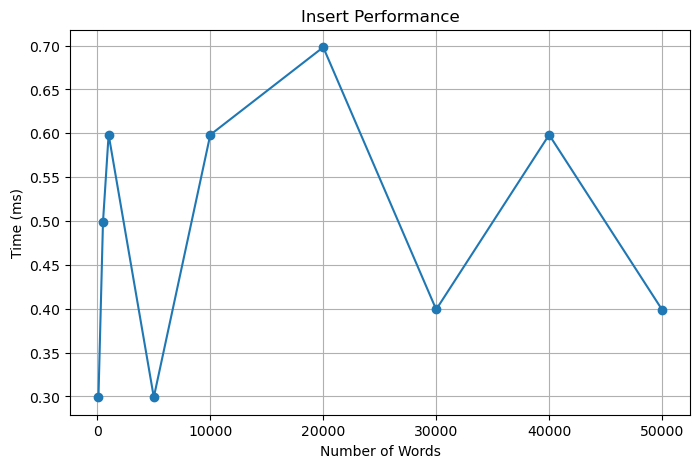

In [28]:
plot_results(insert_results, "Insert Performance", "Time (ms)")

**Search Benchmarks**

We do the same for **searching words** in TSTree.

* **Fixed Sample Search**

In [29]:
fixed_search_results = benchmark_search_fixed_sample(words, sizes)


Search Performance (Fixed Sample)
     100 words → Search avg: 0.20 ms
     500 words → Search avg: 0.30 ms
    1000 words → Search avg: 0.20 ms
    5000 words → Search avg: 0.10 ms
   10000 words → Search avg: 0.10 ms
   20000 words → Search avg: 0.20 ms
   30000 words → Search avg: 0.40 ms
   40000 words → Search avg: 0.10 ms
   50000 words → Search avg: 0.70 ms


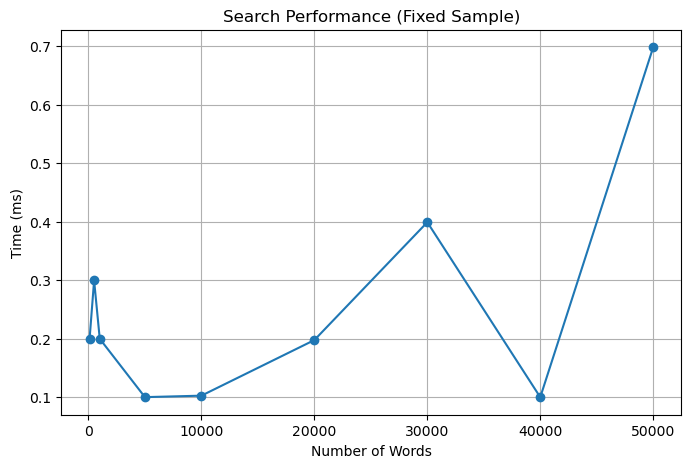

In [30]:
plot_results(fixed_search_results, "Search Performance (Fixed Sample)", "Time (ms)")


* **Random Sample Search**

In [33]:
random_search_results = benchmark_search_random_sample(words, sizes)


Search Performance (Random from Inserted)
     100 words → Search avg (random): 0.20 ms
     500 words → Search avg (random): 0.40 ms
    1000 words → Search avg (random): 0.50 ms
    5000 words → Search avg (random): 0.30 ms
   10000 words → Search avg (random): 0.20 ms
   20000 words → Search avg (random): 0.40 ms
   30000 words → Search avg (random): 0.30 ms
   40000 words → Search avg (random): 0.20 ms
   50000 words → Search avg (random): 0.40 ms


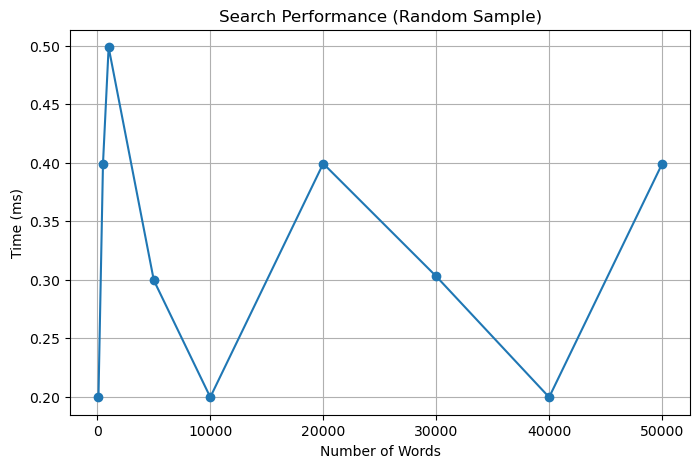

In [34]:
plot_results(random_search_results, "Search Performance (Random Sample)", "Time (ms)")

**Comparision with Python set**

In [36]:
from benchmark.benchmark import compare_with_set

In [38]:
compare_with_set(words)


----------------------------------------------

Comparing TSTree and Python set for 100-word 
Insert time (set):     18.9476 ms
Insert time (TSTree):  1570.7971 ms
Search time (set):     0.0000 ms
Search time (TSTree):  5.9860 ms


* set is significantly faster for insert and exact-match search.

* set does not support ordered or prefix search.

* TSTree supports prefix-based search efficiently.

**Comparision with BTree**

In [39]:
# Now import TSTree
from btree.btree import Btree
from tstree.tstree import TSTree

* **Structural Difference**

In [2]:
btree = Btree()
btree.insert('abc')
btree.insert('aqc')
btree.insert('aaq')
print(btree)

abc
  aaq
  aqc


In [3]:
tst = TSTree()
tst.insert('abc')
tst.insert('aqc')
tst.insert('aaq')
print(tst)

'a' (end=False)
  'b' (end=False)
    'a' (end=False)
      'q' (end=True)
    'c' (end=True)
    'q' (end=False)
      'c' (end=True)


* **Performance Comparison**

In [40]:
from benchmark.benchmark import compare_btree_tstree
import random

random.shuffle(words)
insert_sample = words[:1000]                
hold_out_sample = words[1000:1100] 
compare_btree_tstree(insert_sample, hold_out_sample)


----------------------------------------------

Comparing TSTree and BTree

Inserting 1000 words...
Btree insert time:   0.0062s
TSTree insert time:  0.0181s
Btree search time:   0.0007s
TSTree search time:  0.0011s
TSTree prefix search (prefix='ca'): 0.0002s

Summary:
Operation                  Btree      TSTree
--------------------------------------------
Insert                    0.0062      0.0181
Search                    0.0007      0.0011
Prefix Search                N/A      0.0002


| Operation     | BTree                       | TSTree                          |
| ------------- | --------------------------- | ------------------------------- |
| Insert        | Fast (full-word comparison) | Slower (character-by-character) |
| Search        | Fast for exact match        | Slightly slower                 |
| All Strings   | Costly traversal            | Efficient traversal             |
| Prefix Search | Not supported               | Efficient and direct            |

## Summary
TSTree offers rich functionality with lexicographic and prefix-based searches.

It is slower than BTree and set for raw operations but outperforms them in flexibility and prefix capabilities.

Suitable for autocomplete, dictionary lookup, and incremental text matching in large datasets.